# SVM classification

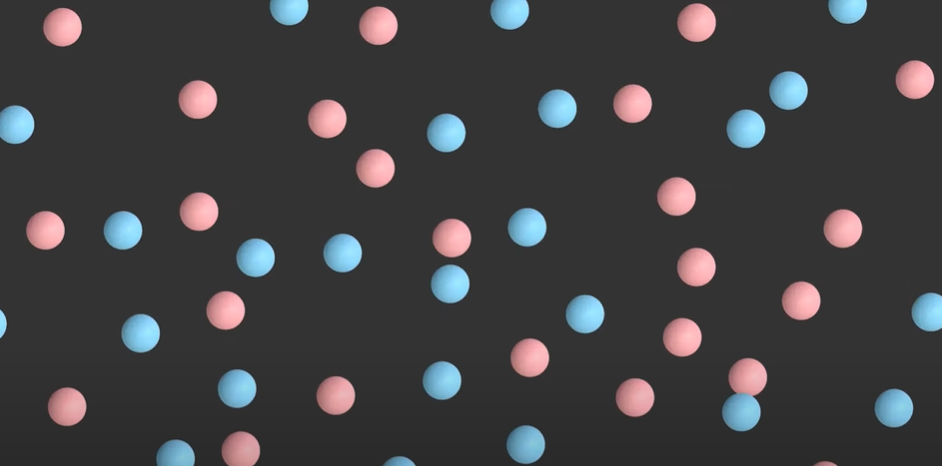
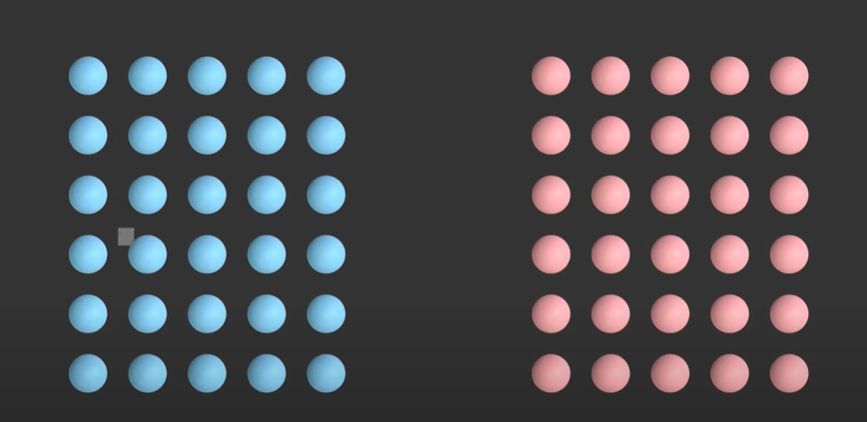
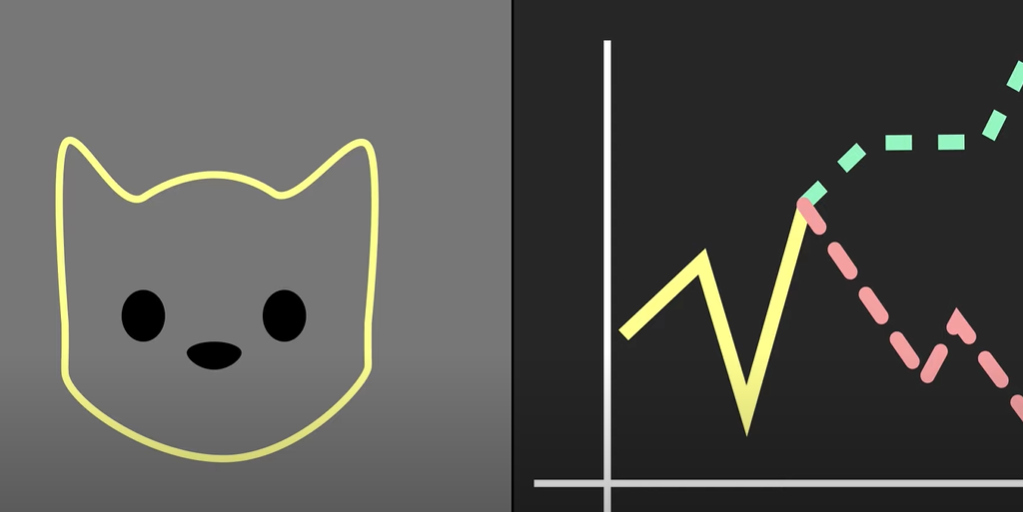
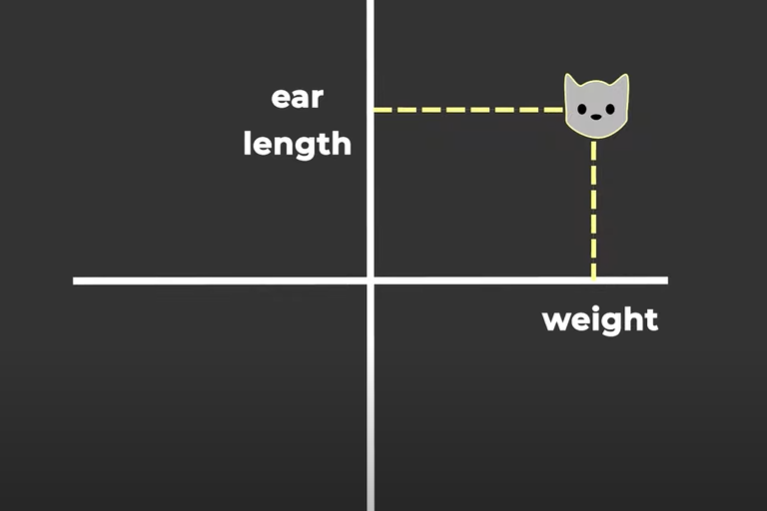
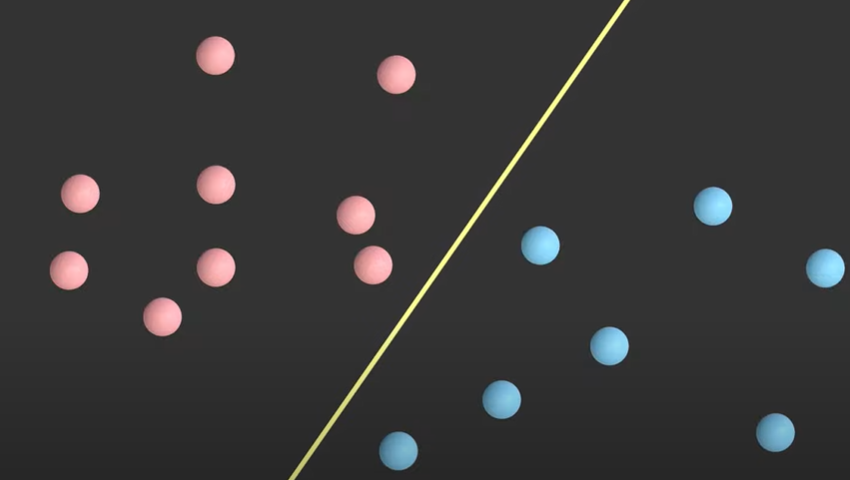
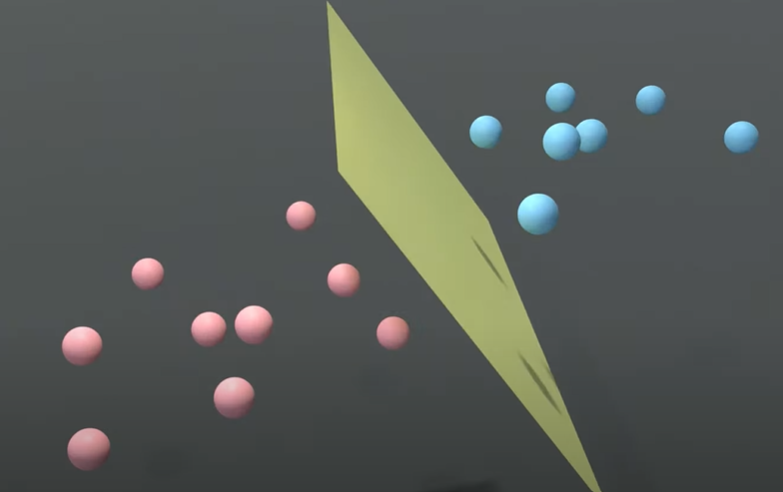
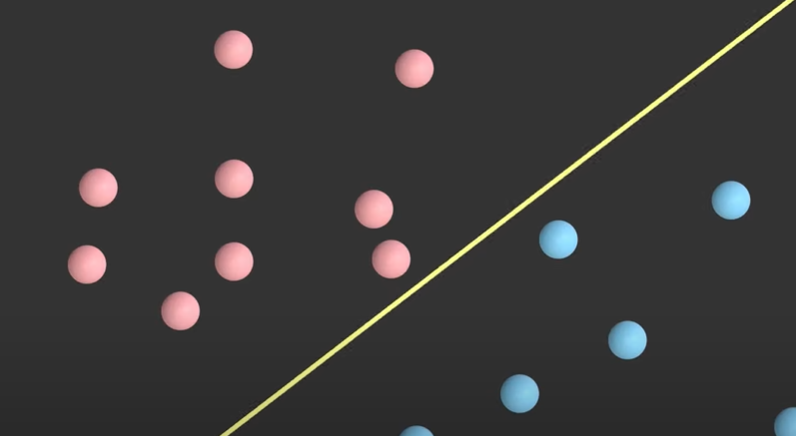
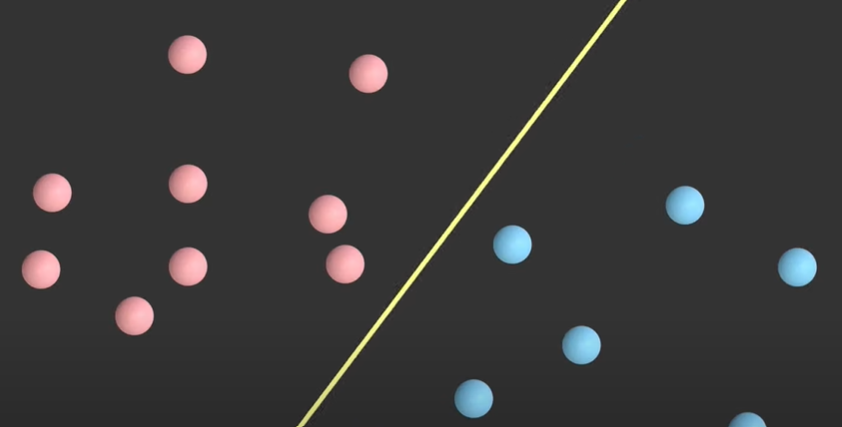
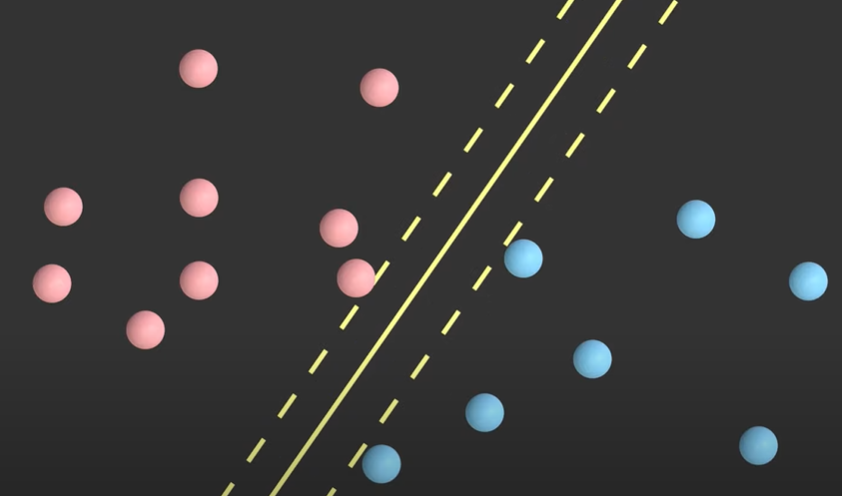
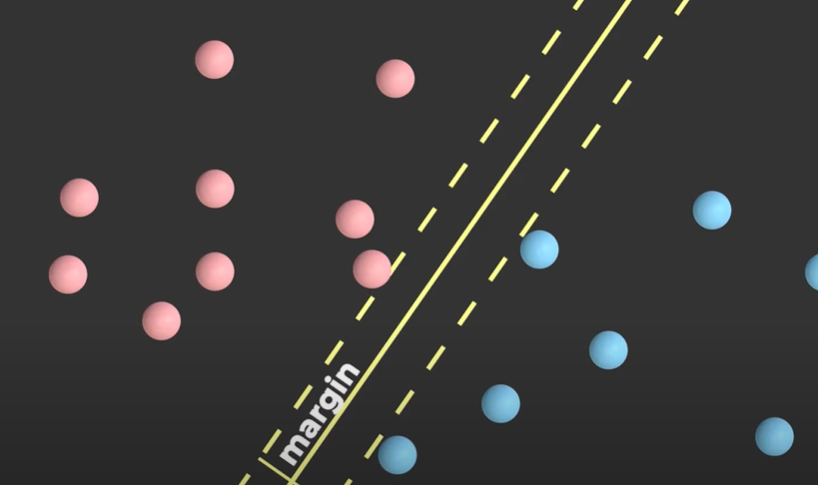
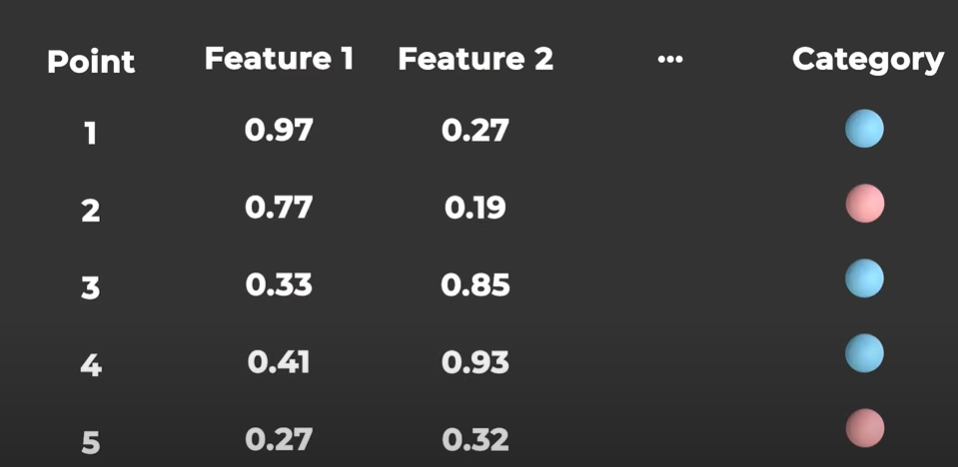
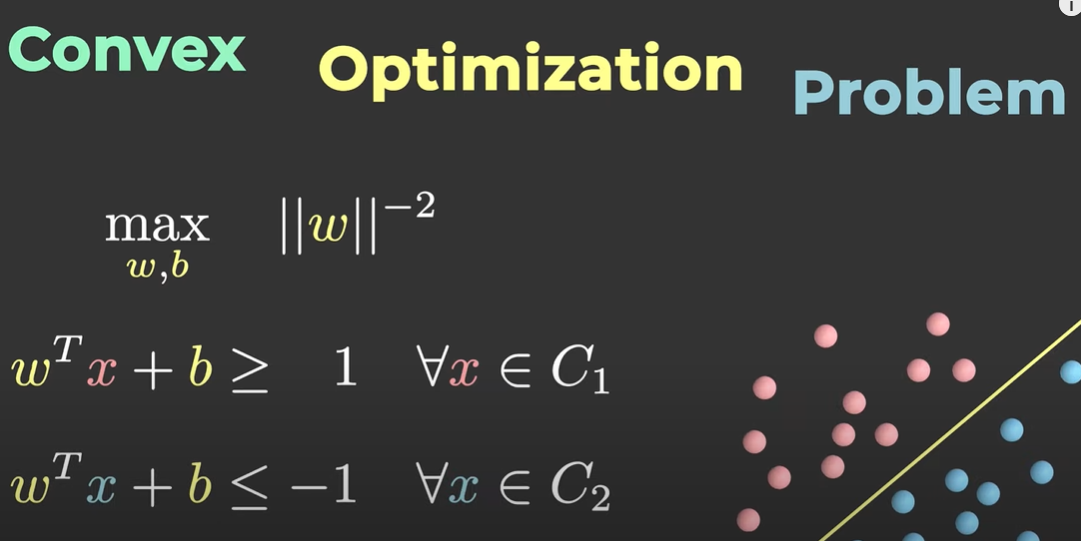
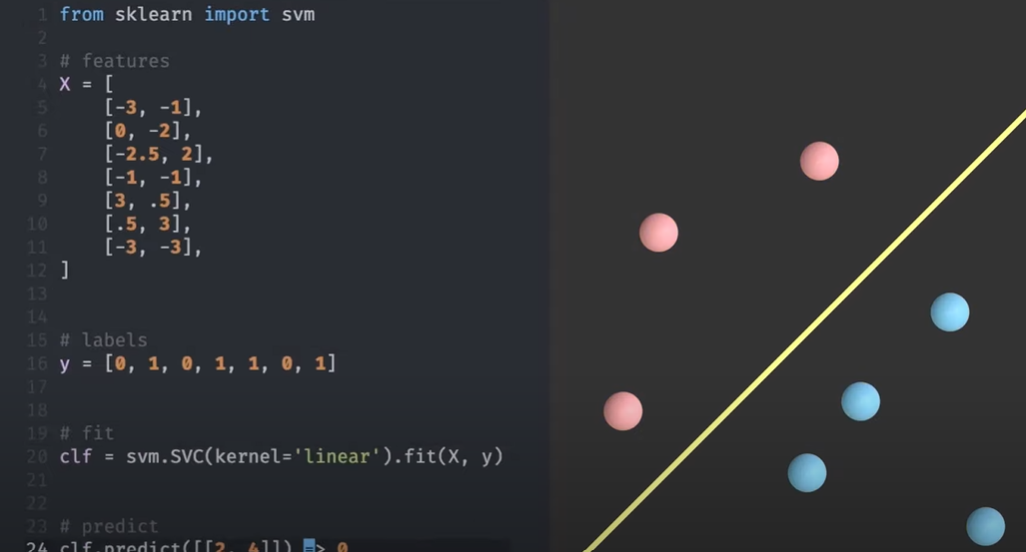


## Dataset Processing

In [72]:
import numpy as np
import os
from pathlib import Path

import matplotlib.pyplot as plt
from keras.preprocessing import image

In [100]:
# Import the required libraries
p = Path("Images/")  # Define the path to the 'Images' directory
dirs = p.glob("*")    # Use glob to list all subdirectories (assumed to be categories like 'cat' and 'dog')

# Dictionary to map folder names (e.g., 'cat', 'dog') to numerical labels
labels_dict = {'cat': 0, 'dog': 1}

# Lists to store image data and corresponding labels
image_data = []
labels = []    

# Iterate over each subdirectory (folder) in 'Images'
for folder_dir in dirs:
    # Extract folder name from the directory path and remove the trailing character
    label = str(folder_dir).split("\\")[-1][:-1]
    
    # Iterate over each image file (JPEG format) in the current folder
    for img_path in folder_dir.glob("*.jpg"):
        # Load the image and resize it to 32x32 pixels
        img = image.load_img(img_path, target_size=(32,32))
        
        # Convert the image into a numerical array (pixel values)
        img_array = image.img_to_array(img)
        
        # Append the image array to the 'image_data' list
        image_data.append(img_array)
        
        # Append the corresponding numerical label to the 'labels' list
        labels.append(labels_dict[label])


In [101]:
print(len(image_data))
print(len(labels))

404
404


In [102]:
#print(image_data)

In [103]:
## Convert data into numpy array

image_data = np.array(image_data, dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape, labels.shape)

(404, 32, 32, 3) (404,)


In [104]:
import random 
combined = list(zip(image_data, labels))  # Combine image data and labels into a list of tuples
random.shuffle(combined)  # Randomly shuffle the list of combined tuples (image, label)

image_data[:], labels[:] = zip(*combined)  # Unzip the shuffled list into separate image_data and labels lists


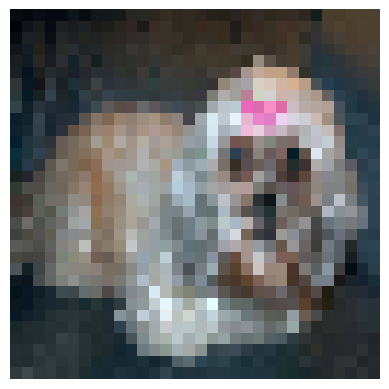

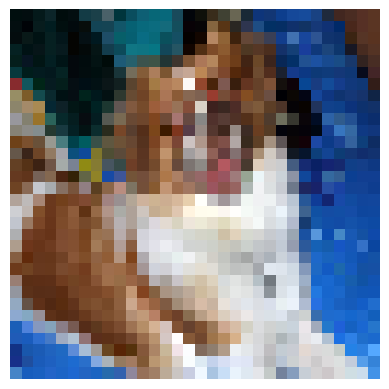

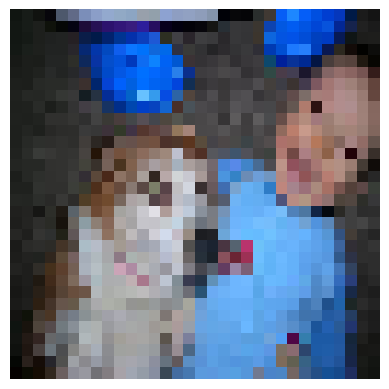

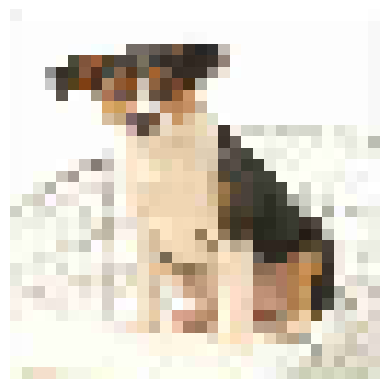

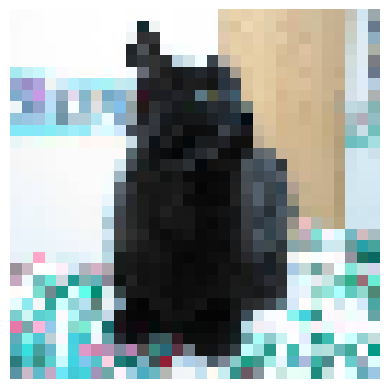

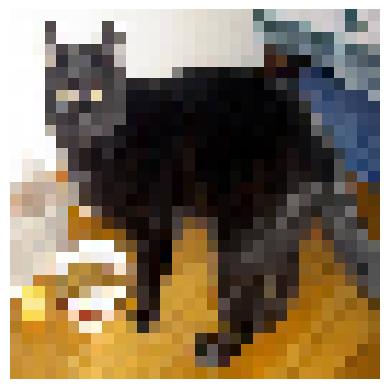

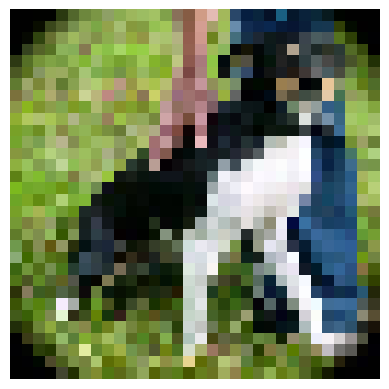

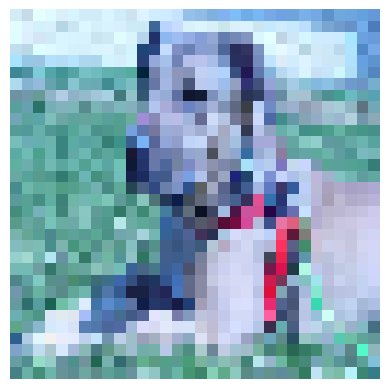

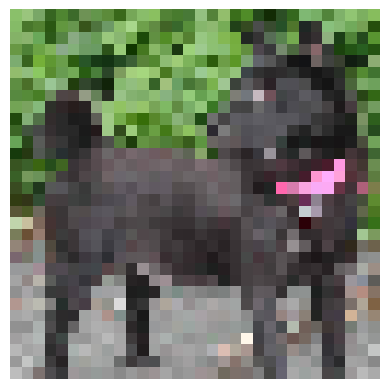

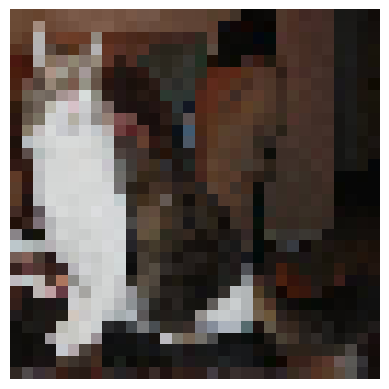

In [105]:
## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data[i])

In [106]:
M = image_data.shape[0]  # M is the number of samples (images)
image_data = image_data.reshape(M, -1)  # Reshape the image data into a 2D array
print(image_data.shape)  # Print the new shape of image_data
print(labels.shape)  # Print the shape of labels


(404, 3072)
(404,)


In [107]:
number_of_classes = len(np.unique(labels))
print(number_of_classes)

2


## Using scikit learn

In [108]:
from sklearn import svm

In [109]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Define the SVM classifier with a linear kernel
svm_classifier = svm.SVC(kernel='linear', C=1.0)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
ypred_sklearn = svm_classifier.predict(X_test)

# Calculate and print accuracy on the test set
accuracy = accuracy_score(y_test, ypred_sklearn)
print(f"Test set accuracy: {accuracy:.4f}")

# Optionally, evaluate accuracy on the training data as well
train_accuracy = svm_classifier.score(X_train, y_train)
print(f"Training set accuracy: {train_accuracy:.4f}")


Test set accuracy: 0.3580
Training set accuracy: 0.7957


## Confusion Matrix

In [110]:
from sklearn.metrics import confusion_matrix

Confusion Matrix:
 [[17 23]
 [29 12]]


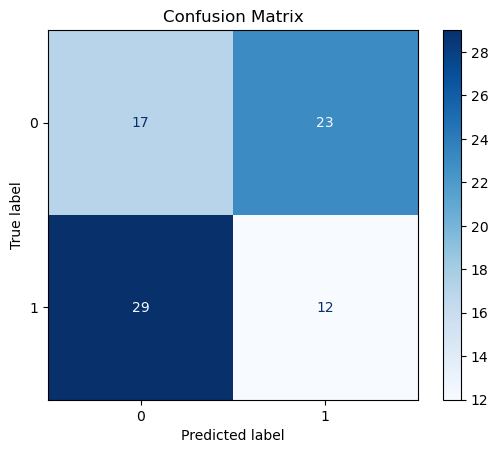

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix using test data
cnf_matrix_sklearn = confusion_matrix(y_test, ypred_sklearn)
print("Confusion Matrix:\n", cnf_matrix_sklearn)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_sklearn, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Task 1 : Write the code and for training KNN and Decision Tree classifiers and find their Test set accuracies.

# Task 2: Optional. Find some other image dataset and train all three models on it using same code.